# Lab 6 - Decision Trees, Random forest, k-Nearest Neighbors & k-Fold Cross Validation


In [ ]:
########################################
# Imports
########################################

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml as get_dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from tqdm import tqdm_notebook

plt.style.use('seaborn')

# MNIST dataset

In this lab we will use the handwritten digits dataset, a collection of $28x28$ grayscale images containing the digits from $0$ to $9$. We will implement **$k$-Nearest Neighbors** (k-NN) for classifing new unseen images of digits. In particular we will see how to implement **$5$-Fold Cross-Validation** for finding the best parameter $k$ of the k-NN algorithm. Let's start!


The first step is to load the dataset, that in this case is already contained in the *sklearn* package. Once loaded we have to implement the **$5$-Fold Cross-Validation**. 


################################################################################
# SUMMARY
################################################################################

Train set size: 1600
Test set size: 400
Number of pixels per image: 784 = 28x28

################################################################################
# SHOW SAMPLES
################################################################################



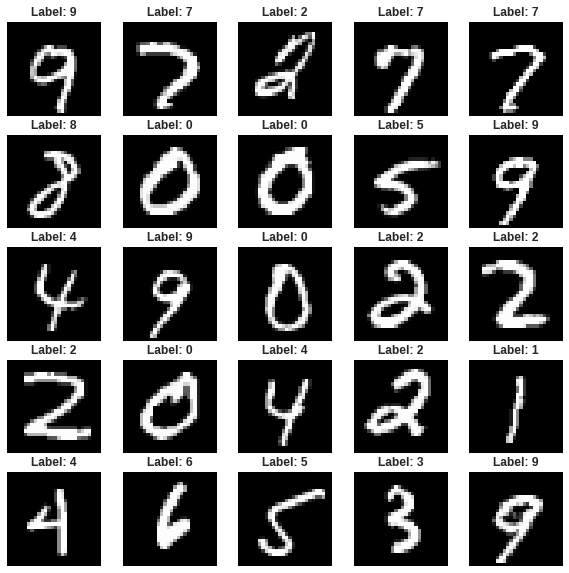

In [ ]:
########################################
# Dataset
########################################

# Load the dataset
x, y = get_dataset('mnist_784', version=1, return_X_y=True)

# Function for splitting the dataset
def split_data(x, y, train_ratio=0.8, seed=None):
    idx_samples = np.arange(len(x), dtype=np.int32)
    if seed is not None:
        np.random.seed(seed)

    ### HERE YOUR CODE ###

    # Shuffle the idx samples

    # compute the train set size
    train_size = 

    # Split the idx into train and validation idx
    idx_train, idx_valid = 
    ### END CODE ###

    return x[idx_train], y[idx_train], x[idx_valid], y[idx_valid]

# Let's work with a subset of the dataset, only for reducing time execution
x, y = x[:2000], y[:2000]

# Split data into train and test sets
x_train, y_train, x_test, y_test = split_data(x, y, train_ratio=0.8, 
                                                seed=1234)

# Process the dataset
x_train, x_test = x_train / 255, x_test / 255 # input in range [0, 1]
y_train, y_test = y_train.astype(np.int32), y_test.astype(np.int32)

# Print summary of the dataset
print('################################################################################')
print('# SUMMARY')
print('################################################################################\n')
print('Train set size:', x_train.shape[0])
print('Test set size:', x_test.shape[0])
print('Number of pixels per image:', x_train.shape[1], '= 28x28')
print()

# Plot some samples of the dataset
print('################################################################################')
print('# SHOW SAMPLES')
print('################################################################################\n')
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.title(f'Label: {y_train[i]}', fontweight='bold')
    plt.imshow(x_train[i].reshape(-1, 28), cmap='gray')
    plt.axis('off')
plt.show()

## Motivating Random Forests: Decision Trees

Random forests are an example of an *ensemble learner* built on decision trees.
For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.
For example, if you wanted to build a decision tree to classify an animal you come across while on a hike, you might construct the one shown here:

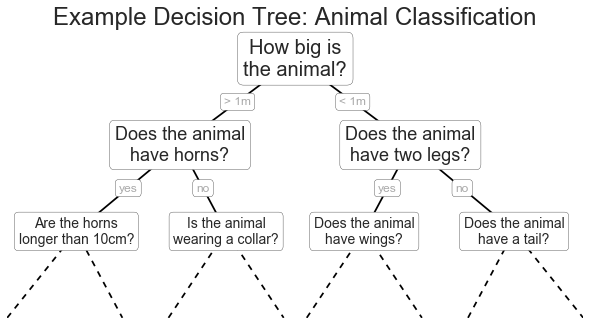

The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes.
The trick, of course, comes in deciding which questions to ask at each step.
In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.


#Gini index vs Entropy Information Gain

Decision Trees can exploit two different function to measure the impurity of a node: Gini Index and Entropy Information Gain. The two are reported below as a remainder:
$$Gini = 1 - \sum_{i=1}^{n}p^2(c_i)$$
$$Entropy = \sum_{i=1}^{n}-p(c_i)log_2(p(c_i))$$

#Scikit-learn implementation of decision trees
Scikit-learn allows you to create decision trees in a simple and intuitive way. In particular, it allows to use both Gini and Entropy as impurity measurements, and to select two different splitting modes: best and random.
- Using best, the model takes the feature with the highest importance
- Using random, the model takes the feature randomly but with the same distribution.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#### HERE YOUR PARAMETERS ####
criterion =  
splitter  = 
tree = DecisionTreeClassifier(criterion=criterion, splitter=splitter, random_state=1)
tree.fit(x_train, y_train)
print('Accuracy score: {}'.format(tree.score(x_valid, y_valid)))

Accuracy score: 0.721875


In [ ]:
#Test here your best model on the test set
print('Accuracy score: {}'.format(tree.score(x_test, y_test)))

Accuracy score: 0.71


### Decision trees and over-fitting

Over-fitting is a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.


In [ ]:
print('Accuracy score on training set: {}'.format(tree.score(x_train, y_train)))

Accuracy score on training set: 1.0


## Ensembles of Estimators: Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called *bagging*.
Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.
An ensemble of randomized decision trees is known as a *random forest*.

## Scikit-learn Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#### HERE YOUR PARAMETERS ####
criterion = 
n_estimators = 
random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=1, criterion=criterion)
random_forest.fit(x_train, y_train)
print('Accuracy score: {}'.format(random_forest.score(x_valid, y_valid)))

Accuracy score: 0.9


In [ ]:
#Test here your best model on the test set
print('Accuracy score: {}'.format(random_forest.score(x_test, y_test)))

Accuracy score: 0.9


# k-Fold Cross Validation

Here you can see a simple diagram to summarize the overall procedure:

![alt text](https://i.postimg.cc/8CVKFb35/k-fold.png)


In [ ]:
########################################
# k-Fold Cross Validation
########################################

def k_fold_cv(x, y, k=5, seed=None):
    '''
    input x: input samples ndarray of shape (num_samples, feat_dim)
    input y: labels ndarray of shape (num_samples)
    input k: number of folds
    input seed: seed for random shuffle
    '''
    idx_samples = np.arange(len(x), dtype=np.int32)
    if seed is not None:
        np.random.seed(seed)
    
    ### HERE YOUR CODE ###

    # Shuffle the samples indices

    # Split the idx samples into k-folds
    idx_sample_folds = 
    ### END CODE ###

    x_train_folds, y_train_folds = [], []
    x_valid_folds, y_valid_folds = [], []
    for idx_k in range(k):
        idx_train, idx_valid = [], []
        for idx_fold in range(k):
            fold = idx_sample_folds[idx_fold]
            if idx_k == idx_fold:
                idx_valid += [fold]
            else:
                idx_train += [fold]

    ### HERE YOUR CODE ###
        # Concatenate folds
        x_train_folds += 
        y_train_folds += 
        x_valid_folds += 
        y_valid_folds += 

    ### END CODE ###

    return x_train_folds, y_train_folds, x_valid_folds, y_valid_folds

# Split train set into k folds, k-1 for train and 1 for validation
x_train_folds, y_train_folds, x_valid_folds, y_valid_folds = k_fold_cv(x_train, y_train, k=5, seed=1234)

In [ ]:
# Summary of the k-Fold Cross Validation
print('################################################################################')
print('# SUMMARY k-FOLD CROSS VALIDATION')
print('################################################################################\n')
print('k :', len(x_train_folds))
print('Train size (= (k-1) * fold_size):', len(x_train_folds[0]))
print('Validatio size (= fold size):', len(x_valid_folds[0]))


################################################################################
# SUMMARY k-FOLD CROSS VALIDATION
################################################################################

k : 5
Train size (= (k-1) * fold_size): 1280
Validatio size (= fold size): 320


# k-Nearest Neighbors
Given a training data 

$$\mathcal{T} = \{ (x_1, y_1), \dots, (x_N, y_N) \}$$

the algorithm makes predictions as follows:

> * **Input**: training data $\mathcal{T}$, $1 \leq k \in \mathbb{N}$ and a new data point $x$
* **Output**: predict class for $x$
 * $\mathcal{D} \leftarrow \{ x_1, \dots, x_N \}$
 * $\mathcal{N(x)} \leftarrow $ $k$ closest points to $x$ in $\mathcal{D}$, under a distance funcion $d(\cdot, \cdot)$
 * return the most frequent class associated with points in $\mathcal{N}(x)$ 



## Distances
In order to implement $k$-NN we have to specify a distance function. Here the most commons ones: 

* **L2 distance**
$$dist_{L2}\left( x^{(0)}, x^{(1)} \right) = \sqrt{\sum_i \left(x^{(0)}_i - x^{(1)}_i\right) ^ 2}$$

* **L1 distance**
$$dist_{L1}\left( x^{(0)}, x^{(1)} \right) = \sum_i \left|x^{(0)}_i - x^{(1)}_i \right|$$

In [ ]:
########################################
# Distance functions
########################################

# L2 distance
def dist_l2(x1, x2):

    ### HERE YOUR CODE ###
    d_12 = 
    ### END CODE ###
    return d_12

# L1 distance
def dist_l1(x1, x2):

    ### HERE YOUR CODE ###
    d_12 = 
    ### END CODE ###
    return d_12

***Hint***: to solve the exercise use the functions 
* [np.argsort(...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html)
* [stats.mode(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html)

In [ ]:
########################################
# K-NN Model class
########################################

class KNNModel(object):
    def __init__(self, x, y, k=1, num_classes=10):
        self.k = k
        self.x = x
        self.y = y
        self.num_classes = num_classes

    def predict(self, x, dist_func, get_freq=False):
        def get_k_closest_points(x_i, x_list):

            ### HERE YOU CODE ###
            d_list = 
            idx_k = 
            ### END CODE ###

            return idx_k

        # Compute the distance between x and self.x using dist_func
        dist_matrix_k = np.zeros([x.shape[0], self.k], dtype=np.int32)
        for i, x_i in enumerate(x):
            dist_matrix_k[i, :] = get_k_closest_points(x_i, self.x)

        # Voting
        y_pred_k = self.y[dist_matrix_k]

        # Get the most frequent class and also all the voting frequency
        if get_freq:
            y_pred_freq = np.zeros([len(y_pred_k), self.num_classes], dtype=np.float32)
            for cl in range(self.num_classes):
                idx = np.where(y_pred_k == cl)
                idx_row = np.array(list(set(idx[0].tolist())), dtype=np.int32)
                y_pred_freq[idx_row, cl] = (y_pred_k[idx_row] == cl).sum(axis=-1)
            y_pred_freq = y_pred_freq / self.k
            return y_pred_freq.argmax(axis=-1), y_pred_freq
        else:

            ### HERE YOUR CODE ###
            mode = 
            ### END CODE ###

            return mode


# Find the best parameter k for the k-NN using 5-Fold Cross Validation
We are going to select the best parameter $k$ for the $k$-NN as follows:

$$\hat{k} = argmax_k\{ accuracy_k \}$$

where $accuracy_k$ is the validation accuracy given by the k-NN from the 5-Fold Cross Validation.

In [ ]:
def get_accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

This cell can take some minutes to run...

In [ ]:
k_list = np.arange(1, 11, dtype=np.int32)

# Loop over k values
acc, acc_std = {}, {}
for k in k_list:

    # Loop over 5-Folds
    acc_folds = []
    for x_train, y_train, x_valid, y_valid in tqdm_notebook(zip(x_train_folds, 
                                                                y_train_folds, 
                                                                x_valid_folds, 
                                                                y_valid_folds), 
                                                            total=5, 
                                                            desc=f'k = {k}'):

        # Create the k-nn model
        knn = KNNModel(x_train, y_train, k=k)

        ### HERE YOUR CODE ###
        # Predict
        y_valid_pred = 
        ### END CODE ###

        # Evaluate model
        acc_fold = get_accuracy(y_valid, y_valid_pred)
        acc_folds += [acc_fold]
    
    # Average accuracies over folds
    acc[k] = np.mean(acc_folds)
    acc_std[k] = np.std(acc_folds)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


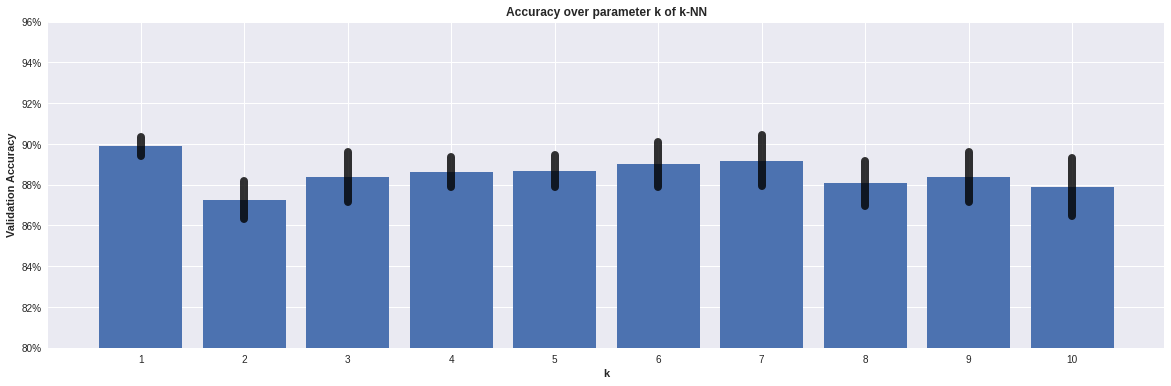

In [ ]:
# Plot accuracy over parameter k
plt.figure(figsize=(20, 6))
plt.title('Accuracy over parameter k of k-NN', fontweight='bold')
plt.bar(list(acc.keys()), list(acc.values()))
for k in acc.keys():
    plt.plot([k, k], [acc[k] - acc_std[k], acc[k] + acc_std[k]], c='k', lw=8, alpha=0.8)
plt.ylim(0.8, 0.95)
plt.xlabel('k', fontweight='bold')
plt.ylabel('Validation Accuracy', fontweight='bold')
yticks, _ = plt.yticks()
plt.yticks(yticks, [f'{int(100 * yy)}%' for yy in yticks])
plt.xticks(k_list)
plt.show()

In [ ]:
# Best k
idx_k_best = np.array(list(acc.values())).argmax()
k_best = list(acc.keys())[idx_k_best]
print(f'Best k: {k_best}')

# Best model
knn = KNNModel(x_train, y_train, k=k_best)

Best k: 1


In [ ]:
# Predictions with best model
pred_valid = knn.predict(x_valid, dist_l2)
pred_test, pred_freq_test = knn.predict(x_test, dist_l2, get_freq=True)

# Evaluation
acc_valid = get_accuracy(y_valid, pred_valid)
acc_test = get_accuracy(y_test, pred_test)
print(f'Validation accuracy: {100 * acc_valid:.2f}%')
print(f'Test accuracy: {100 * acc_test:.2f}%')

Validation accuracy: 89.38%
Test accuracy: 88.25%


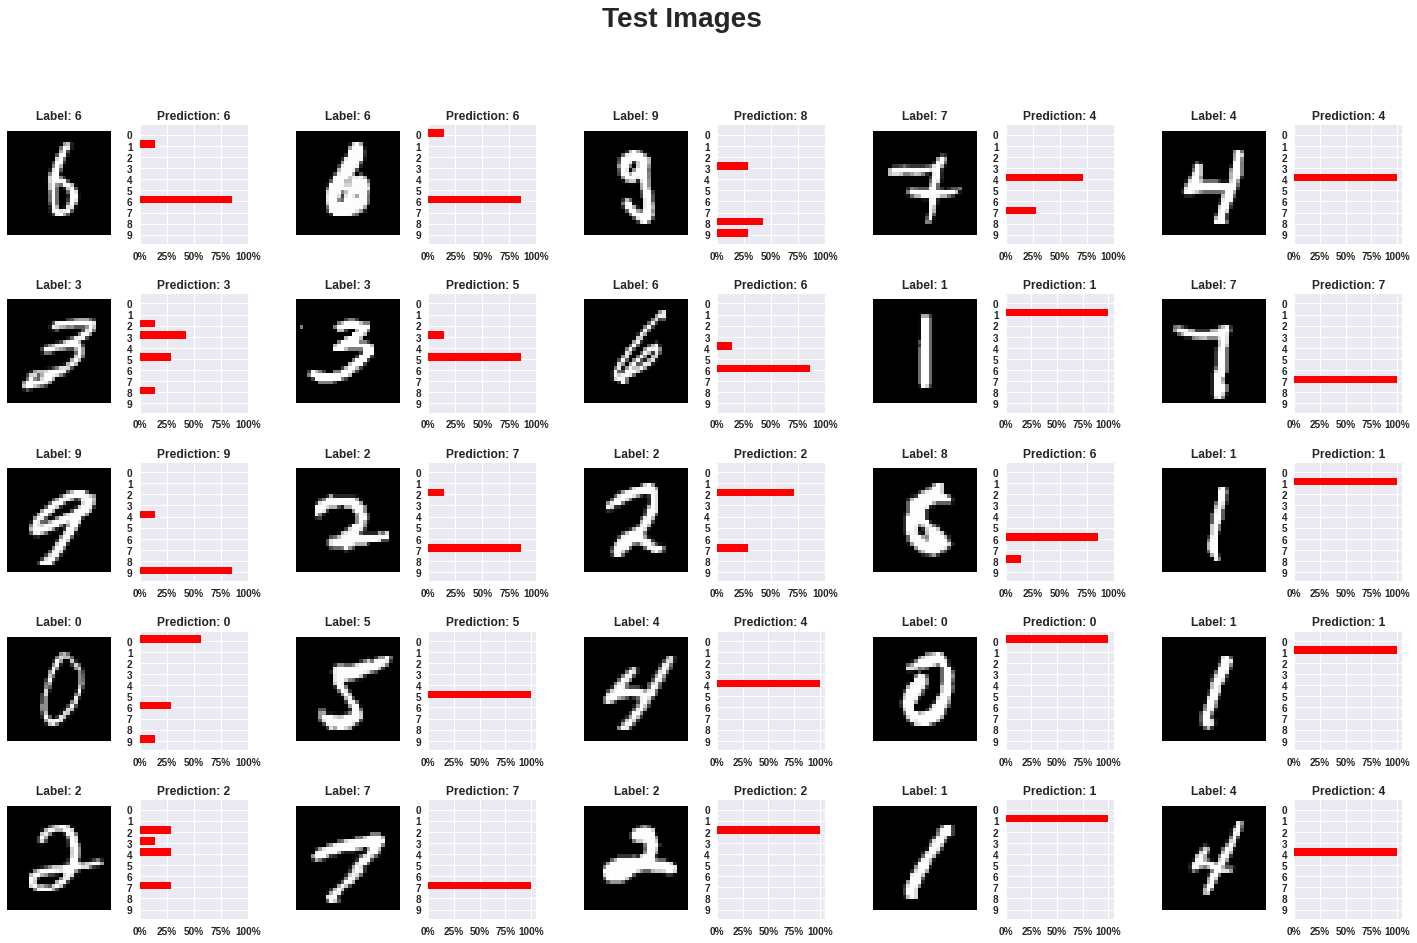

In [ ]:
def plot_predictions(x, y, pred_freq, num_col=5, show_max=25, seed=None):
    if len(x) > show_max:
        if seed is not None:
            np.random.seed(seed)
        idx_random = np.random.randint(len(x), size=show_max)
        x = x[idx_random]
        y = y[idx_random]
        pred_freq = pred_freq[idx_random]
    num_rows = int(np.ceil(len(x) / num_col))
    fig, axs = plt.subplots(num_rows, num_col, figsize=(25, num_rows * 3))
    fig.suptitle('Test Images', fontweight='bold', fontsize=28)

    for idx_sample in range(len(x)):
        idx_row = idx_sample // num_col
        idx_col = idx_sample % num_col
        ax = axs[idx_row, idx_col]
        ax.set_title(f'Label: {y[idx_sample]}', fontweight='bold')
        ax.imshow(x[idx_sample].reshape(-1, 28), 
                    cmap='gray')
        ax.set_aspect(1.)
        ax.axis('off')
        divider = make_axes_locatable(ax)
        axHisty = divider.append_axes("right", 1.5, pad=0.4, sharey=ax)
        axHisty.barh(np.linspace(0, 27, 10), 
                        pred_freq[idx_sample], height=2.0, color='r')
        axHisty.set_xticks(np.linspace(0, 1, 5))
        axHisty.set_title(f'Prediction: {pred_freq[idx_sample].argmax()}', 
                          fontweight='bold')
        axHisty.set_xticklabels([f'{int(xx * 100)}%' for xx in np.linspace(0, 1, 5)], fontweight='bold')
        axHisty.set_ylim(30, -2)
        axHisty.set_yticks(np.linspace(0.5, 27.5, 10))
        axHisty.set_yticklabels(np.arange(10), fontweight='bold')
    plt.show()
 
# Show test results
axs = plot_predictions(x_test, y_test, pred_freq_test, show_max=25, seed=None)

If you change the best parameter $\hat{k}$ for the $k$-NN you can see different behaviour both in terms of accuracy and also in terms of frequency in voting (red lines in the plot above).